# Final Examination

## 65 points total

### Instructions:

Attempt all questions. You have three hours. 

Complete all work on a Python notebook. Completed notebooks are to be submitted to the D2L Final Examination Dropbox.

You have access to all old assignments and course notes on your home directory, and any other resources that you may have downloaded in advance. Access to all websites, other than the PJL repository and D2L are turned off. Likewise, ssh and sftp are turned off.

Don't panic! And good luck.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Part A (40 points). The extended Ising model in one dimension

Consider the extended Ising model in one dimension,
$$H=-J_1\sum_{i=1}^NS_iS_{i+1}-J_2\sum_{i=1}^NS_iS_{i+2}+\mu_BB\sum_{i=1}^NS_i,$$
where as usual $S_i\in\{-1,1\}$, but now we have nearest-neighbour interactions with strength $J_1$ and next-nearest-neighbour interactions with strength $J_2$. In principle, $J_1$ and $J_2$ can both be either positive or negative. As usual, $B$ is the magnetic field strength, so the last term is the Pauli paramagnetic contribution. Assume that the lattice has periodic boundary conditions. 

In addition to the energy and entropy, it is useful to calculate the averages of spin functions, especially the single-spin average
$$\overline{S_1}=\frac{1}{N}\sum_{i=1}^N S_i$$
and the nearest-neighbour two-spin average
$$\overline{S_1S_2}=\frac{1}{N}\sum_{i=1}^N S_iS_{i+1}.$$

### Question A1 (12 points)
Without doing any calculations, briefly describe qualitatively the ground state (at zero temperature) when

**(a) (2 points)** $J_1>0$ and $J_2>0$ and $B>0$;

**(b) (2 points)** $J_1>0$ and $J_2>0$ and $B=0$;

**(c) (2 points)** $J_1<0$ and $J_2=0$ and $B=0$;

**(d) (2 points)** $J_1=0$ and $J_2<0$ and $B=0$;

**(e) (2 points)** $J_1<0$ and $J_2>0$ and $B=0$.

**(f) (2 points)** Speculate on what might happen for $J_1<0$ and $J_2<0$ and $B=0$.

# Question A1
#### Ground state: Lowest energy.
    a. J1, J2 are positive - least energy if they're aligned. B is positive - least energy if pointed opposite the field. Ground state: All aligned downwards. [-1,-1,-1,-1,-1,-1,-1,-1]
    b. J1, J2 are positive - least energy if they're aligned. B is 0 - doesn't change anything. Ground state: All aligned downwards, or all aligned upwards [-1,-1,-1,-1,-1,-1,-1,-1] or [11111111111]
    c. J1 negative - least energy if antialigned with nearest neighbour. J2 = 0 - contributes nothing. B = 0 - contributes nothing. Ground state: All antialigned [1,-1,1,-1,1,-1...]
    d. J1 0 - contributes nothing. J2 negative - least energy if second nearest neighbours are antialigned. B = 0, contributes nothing. Ground state: Neighbours are anything, but the spin is antialigned with all its second neighbours, [1, 1, -1, -1, 1, 1, -1, -1...] or [-1, 1, 1, -1, -1, 1...]. Oh, so pattern is aligned with one neighbour, antialigned with the other. Huh.
    e. J1 < 0,  lowest energy if all antialigned with neighbours. J2 > 0 - lowest energy if aligned with second neighbours. B = 0: Mag field contributes nothing. Ground state: Exactly  the same as in c, [1, -1, 1, -1, 1, -1...] since being antialigned with neighbours means your neighbour is antialigned with its neighbours, which means your second neighbours are aligned!
    f.J1 < 0,  lowest energy if all antialigned with neighbours. J2 < 0 - lowest energy if antialigned with second neighbours. This doesn't synergize; it conflicts, brutally. B = 0: Magnetic field doesn't contribute. Ok, so what this? I suspect it depends on if J1 is stronger, or J2 is stronger. If J1 is stronger, then the c. pattern will tend to hold, overriding the influence from J2. If J2 is stronger, then we get something like [1, 1, -1, -1, 1, 1, -1, ...]. In any case, what I see is that they conflict.

### Question A2 (18 points)
Using the Monte Carlo iterative algorithm with Metropolis importance sampling, obtain the ground states for $N=40$ sites, temperature $T=|J_1|/k_B$, for:

**(a) (6 points)** $J_1=1$ and $J_2=-1$ and magnetic fields in the range $-2|J_1|/\mu_B\leq B\leq 2|J_1|/\mu_B$; obtain the energy, entropy, single-spin, and two-spin averages for each case and plot them as a function of magnetic field; comment on the results;

**(b) (6 points)** $J_1=-1$ and $J_2=1$ and magnetic fields in the range $-3|J_1|/\mu_B\leq B\leq 3|J_1|/\mu_B$; obtain the energy, entropy, single-spin, and two-spin averages for each case and plot them as a function of magnetic field; comment on the results;

**(c) (6 points)** $J_1=-1$ and $J_2=-1$ and magnetic fields in the range $-5|J_1|/\mu_B\leq B\leq 5|J_1|/\mu_B$; obtain the energy, entropy, single-spin, and two-spin averages for each case and plot them as a function of magnetic field; comment on the results.

In [16]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt

"""
Given a list of 1s and -1s, flips a random bit and returns the flipped bit list
"""
def randFlip(Ns):
  i = len(Ns)
  listN = np.copy(Ns)
  #Pick a random bit to flip
  a = rand.randint(i)
  #Flip it
  listN[a] *= -1
  return listN

"""
Using the dimensionless Hamiltonian, evaluates the total mechcanical energy of
a list of 1 and -1 spins.
"""
def evalEnergy(Ns, B, J1, J2):
  Nlen = len(Ns)

  #Sum over the energies of its neighbours
  sumNeighbours = 0
  for i in range(Nlen):
    js = [(i + 1) % Nlen, (i - 1) % Nlen]
    for j in js:
      sumNeighbours += Ns[i] * Ns[j]
  sumNeighbours /= (-2 * J1)

  #Sum over energies of second neighbours
  sumSecondNeighbours = 0
  for i in range(Nlen):
    js = [(i + 2) % Nlen, (i - 2) % Nlen]
    for j in js:
      sumSecondNeighbours += Ns[i] * Ns[j]
  sumSecondNeighbours /= (-2 * J2)

  #Sum over its energy in the content of a magnetic field.
  Bres = 0
  for spin in Ns:
    Bres += B * spin
  
  return (sumNeighbours + sumSecondNeighbours + Bres)

def singleSpinAvg(Lst):
    size = len(Lst)
    val = sum(Lst)
    return val/size

def twoSpinAvg(Lst):
    size = len(Lst)
    val = 0
    for i in range(size):
        nextI = (i + 1) % size
        val += Lst[i]*Lst[nextI]
    return val/size

"""
Does metropolis sampling on some N of large size, to some number of desired iterations

May need to modify to append and return all points the algorithm has been to as a question.
"""
def metropolis(N, B, T, iters, J1, J2, debug = False):
  currentList = rand.choice([-1,1], N)

  priorList = np.copy(currentList)
  priorE = 2147483647 #Integer max, though Python can do much bigger. While we don't know what the lowest best is, we just assume it's some huge number and minimize from there.
  
  bestE = 2147483647 #Integer max, though Python can do much bigger. While we don't know what the lowest best is, we just assume it's some huge number and minimize from there.
  bestList = np.copy(currentList)

  #Metropolis sample for how many samples we need to do this for.
  for iteration in range(iters):
    currentList = randFlip(currentList)
    newE = evalEnergy(currentList, B, J1, J2) ## If we get a model different than the Ising model, we just need a different eval energy

    eDiff = newE - priorE
    #print(eDiff)

    #If the result is lower, keep it!
    if eDiff < 0:
      priorE = newE
      priorList = np.copy(currentList)
    #Else...
    else:
      prob = np.exp((-eDiff)/T)
      randVal = rand.random()
      #We might keep it anyways
      if randVal < prob:
        priorE = newE
        priorList = np.copy(currentList)
      #If we don't, then we need to start again at our prior value, since we reject this current value.
      else:
        #If current is not it, assign it back to the prior! Ow, I missed this and everything didn't make sense.
        currentList = np.copy(priorList)
      #Debugging stuff.
      if debug:
        print("----Probs----")
        print(prob)
        print(randVal)

    if debug:
      print(newE)
      print(priorE)
      print(eDiff)
    #Check to see if the result is the new lowest result we've seen yet.
    bestDiff = newE - bestE
    #print(bestDiff)
    #New historical low, keep it.
    if bestDiff < 0:
      bestE = newE
      bestList = np.copy(currentList)
    
  return bestList

"""
This code by Prof. Feder
If it's indented incorrectly, everything breaks horribly! Damn indentation and whitespace errors!
Fixing that fixed everything
"""
def symbol_entropy(datalist):
  
# Estimate the Shannon entropy for a sequence of symbols.
    hist = {}
    for item in datalist:
        if item not in hist:
          hist[item] = 1
        else:
          hist[item] += 1
    
    counts = np.array( [hist[item] for item in hist])
    prob = counts / np.sum(counts)
    prob = prob[ prob != 0 ] #; print(prob)
    entropy = -np.sum( prob * np.log2(prob) )
  
    return entropy

In [29]:
#Question A2 a
N = 40
T = 1 #Units of J/Kb.

start = -2
end = 2
number = 25
B = [b/number for b in range(start * number, end * number)]

J1 = 1
J2 = -1

iters = 5000

print(B)
print(energy)

energy = []
entropy = []
singleSpin = []
twoSpin = []
for b in B:
    res = metropolis(N, b, T, iters, J1, J2, debug = False)
    energy.append(evalEnergy(res, b, J1, J2))
    entropy.append(symbol_entropy(res))
    singleSpin.append(singleSpinAvg(res))
    twoSpin.append(twoSpinAvg(res))
    

[-2.0, -1.96, -1.92, -1.88, -1.84, -1.8, -1.76, -1.72, -1.68, -1.64, -1.6, -1.56, -1.52, -1.48, -1.44, -1.4, -1.36, -1.32, -1.28, -1.24, -1.2, -1.16, -1.12, -1.08, -1.04, -1.0, -0.96, -0.92, -0.88, -0.84, -0.8, -0.76, -0.72, -0.68, -0.64, -0.6, -0.56, -0.52, -0.48, -0.44, -0.4, -0.36, -0.32, -0.28, -0.24, -0.2, -0.16, -0.12, -0.08, -0.04, 0.0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28, 0.32, 0.36, 0.4, 0.44, 0.48, 0.52, 0.56, 0.6, 0.64, 0.68, 0.72, 0.76, 0.8, 0.84, 0.88, 0.92, 0.96, 1.0, 1.04, 1.08, 1.12, 1.16, 1.2, 1.24, 1.28, 1.32, 1.36, 1.4, 1.44, 1.48, 1.52, 1.56, 1.6, 1.64, 1.68, 1.72, 1.76, 1.8, 1.84, 1.88, 1.92, 1.96]
[-80.0, -79.59999999999998, -79.199999999999989, -78.799999999999969, -78.399999999999977, -78.000000000000057, -77.599999999999952, -77.200000000000045, -76.800000000000054, -76.39999999999992, -76.0, -75.600000000000009, -75.200000000000003, -74.799999999999997, -74.399999999999991, -74.0, -73.60000000000008, -73.199999999999946, -72.799999999999969, -72.4000000000

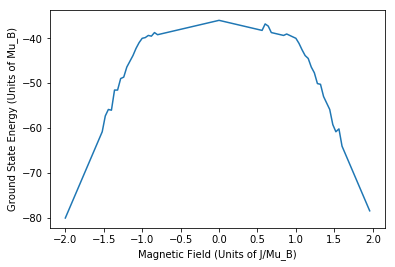

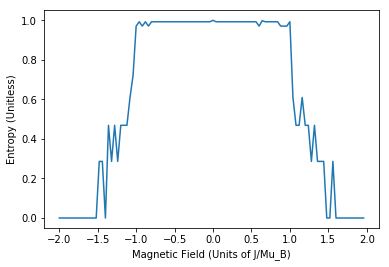

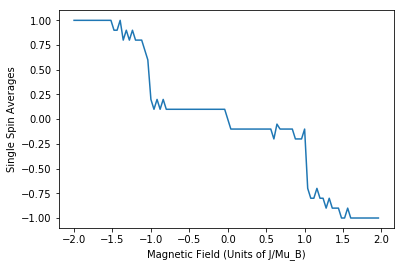

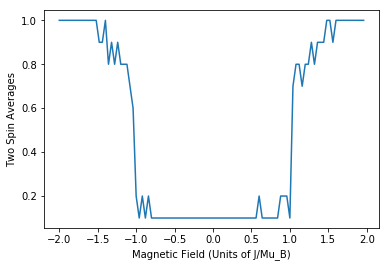

In [34]:
plt.plot(B, energy)
plt.xlabel("Magnetic Field (Units of J/Mu_B)")
plt.ylabel("Ground State Energy (Units of Mu_B)")
plt.figure()

plt.plot(B, entropy)
plt.xlabel("Magnetic Field (Units of J/Mu_B)")
plt.ylabel("Entropy (Unitless)")
plt.figure()

plt.plot(B, singleSpin)
plt.xlabel("Magnetic Field (Units of J/Mu_B)")
plt.ylabel("Single Spin Averages")
plt.figure()

plt.plot(B, twoSpin)
plt.xlabel("Magnetic Field (Units of J/Mu_B)")
plt.ylabel("Two Spin Averages")
plt.figure()

#### Now for the commentary! There's going to be four of these... pain.

This is J1 positive, J2 negative, which aligns/works together as mentioned before. Ok. So, what do we see? Let's go graph by graph.

Ground state energy graph: Holy mackeral this is funny. So, we see a sort of hill shape, with a sharp linear increase in ground state energy at first, which continues to increase at a lower rate after -1.0, then decrease at a lower rate as 0 is passed, then fall rapidly as the 1.0 mark is passed. This seems to me like some sort of phase transition. In particular, above a certain magnitude of the magnetic field, the B field influence is too strong, and forces everyone to align or antialign exactly with it, no matter what. Below this magnitude, spins are free to shuffle around a lot more, up to a maximum ground state where the magnetic field does nothing to it.

The reason for this two-mode ground state is simple. Positive J1 implies the ground state is alignment. Negative J2 only reinforces this. Naturally, it's already trying to align with its neighbours. Meanwhile, the magnetic field is trying to force the spins to align with it. But the spins all want to anti-align with each other. After the -1.0 and 1.0 transition points, the strength of the magnetic field overpowers the spin's desire to align with its neighbour, and so it falls drastically quickly.

Entropy Graph: We see a similar behavior with the entropy graph, and for a similar reason. Low entropy means all the spins are the same; high entropy means that they're freely doing whatever they want like FREE PEOPLES FREE FROM EXAMS! When the magnetic field is strong, it overpowers all the whims of the little ones like the Soviet Central Committee forces collective farms on everyone. When the magnetic field/authority retreats, past a threshold, you get revolution/the spins are allowed to align with their neighbours/freely associate, and so the disorderliness/freedom massively increases.

Single Spin Graph: The reason for the sudden break seen in the entropy graph is made clear here. For much of the -2.0 to 1.5 graph, we can see the spins are basically entirely aligned up with the Big Brother magnetic field, and similar with the other end, only aligned down because the far left and far right look a lot alike. Perfect alignment - only one unique state, entropy is zero, all people are comrades. Then, entropy hits a maximum - which is what we see again. The average is 0, implying an even spread of ups and downs, necesitating 2 bits to represent it - which is maximal entropy since we only have 2 things to represent. 

Two-Spin Graph: This graph further illustrates why this is so. At the ends, the magnetic field overpowers all and forces everyone to align, which is great for the two-spin as it means maximal two-spin sums, but then as the field weakens, this is less true, until it breaks and instead is free to align with its neighbours as it will.

In [84]:
#Question A2 b
N = 40
T = 1 #Units of J/Kb.

start = -3
end = 3
number = 25
B = [b/number for b in range(start * number, end * number)]

J1 = -1
J2 = 1

iters = 5000

energy = []
entropy = []
singleSpin = []
twoSpin = []
for b in B:
    res = metropolis(N, b, T, iters, J1, J2, debug = False)
    energy.append(evalEnergy(res, b, J1, J2))
    entropy.append(symbol_entropy(res))
    singleSpin.append(singleSpinAvg(res))
    twoSpin.append(twoSpinAvg(res))
    

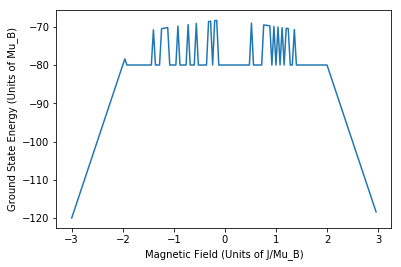

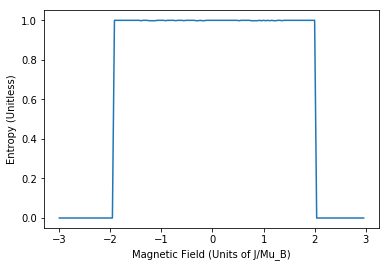

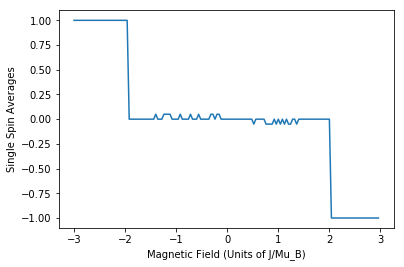

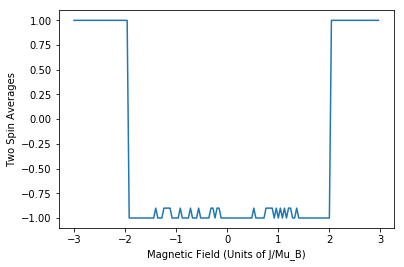

In [36]:
plt.plot(B, energy)
plt.xlabel("Magnetic Field (Units of J/Mu_B)")
plt.ylabel("Ground State Energy (Units of Mu_B)")
plt.figure()

plt.plot(B, entropy)
plt.xlabel("Magnetic Field (Units of J/Mu_B)")
plt.ylabel("Entropy (Unitless)")
plt.figure()

plt.plot(B, singleSpin)
plt.xlabel("Magnetic Field (Units of J/Mu_B)")
plt.ylabel("Single Spin Averages")
plt.figure()

plt.plot(B, twoSpin)
plt.xlabel("Magnetic Field (Units of J/Mu_B)")
plt.ylabel("Two Spin Averages")
plt.figure()

#### Commentary for A2 b

As we can see, we have much of the same shape as A2 a, for most of the same reasons. The main break is the apparent lack of a two-phase transition. We mostly just have all alignment, then all antialignment, and then all alignment again, as opposed to the slightly more nuanced curve. The reason is - J1 being negative implies antialignment, as does J2 being positive. The external field naturally wants to force alignment, and above a certain threshold it succeeds (the 2.0 threshold, maybe because it has to overpower both neighbours thus 2 rather than 1 unlike A2 a?). Once it drops below the threshold, the spins ignore the magnetic field, and just antialign as they want, resulting in zero two-spin averages, and maximal entropy.

In [37]:
#Question A2 c
N = 40
T = 1 #Units of J/Kb.

start = -5
end = 5
number = 25
B = [b/number for b in range(start * number, end * number)]

J1 = -1
J2 = -1

iters = 5000

energy = []
entropy = []
singleSpin = []
twoSpin = []
for b in B:
    res = metropolis(N, b, T, iters, J1, J2, debug = False)
    energy.append(evalEnergy(res, b, J1, J2))
    entropy.append(symbol_entropy(res))
    singleSpin.append(singleSpinAvg(res))
    twoSpin.append(twoSpinAvg(res))
    

[-5.0, -4.96, -4.92, -4.88, -4.84, -4.8, -4.76, -4.72, -4.68, -4.64, -4.6, -4.56, -4.52, -4.48, -4.44, -4.4, -4.36, -4.32, -4.28, -4.24, -4.2, -4.16, -4.12, -4.08, -4.04, -4.0, -3.96, -3.92, -3.88, -3.84, -3.8, -3.76, -3.72, -3.68, -3.64, -3.6, -3.56, -3.52, -3.48, -3.44, -3.4, -3.36, -3.32, -3.28, -3.24, -3.2, -3.16, -3.12, -3.08, -3.04, -3.0, -2.96, -2.92, -2.88, -2.84, -2.8, -2.76, -2.72, -2.68, -2.64, -2.6, -2.56, -2.52, -2.48, -2.44, -2.4, -2.36, -2.32, -2.28, -2.24, -2.2, -2.16, -2.12, -2.08, -2.04, -2.0, -1.96, -1.92, -1.88, -1.84, -1.8, -1.76, -1.72, -1.68, -1.64, -1.6, -1.56, -1.52, -1.48, -1.44, -1.4, -1.36, -1.32, -1.28, -1.24, -1.2, -1.16, -1.12, -1.08, -1.04, -1.0, -0.96, -0.92, -0.88, -0.84, -0.8, -0.76, -0.72, -0.68, -0.64, -0.6, -0.56, -0.52, -0.48, -0.44, -0.4, -0.36, -0.32, -0.28, -0.24, -0.2, -0.16, -0.12, -0.08, -0.04, 0.0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28, 0.32, 0.36, 0.4, 0.44, 0.48, 0.52, 0.56, 0.6, 0.64, 0.68, 0.72, 0.76, 0.8, 0.84, 0.88, 0.92, 0.96, 1.0,

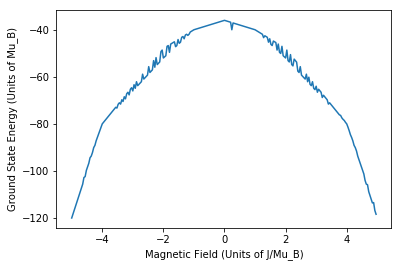

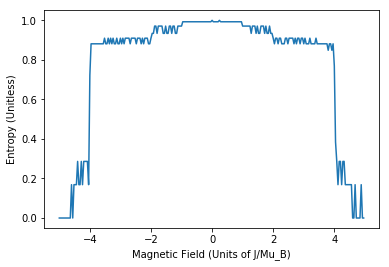

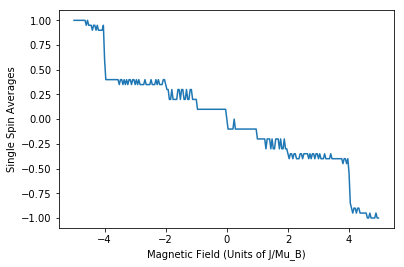

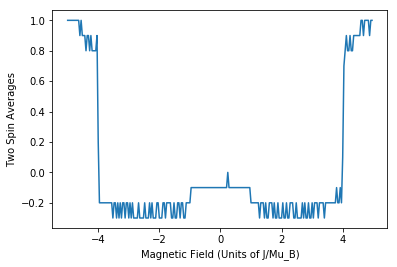

In [38]:
plt.plot(B, energy)
plt.xlabel("Magnetic Field (Units of J/Mu_B)")
plt.ylabel("Ground State Energy (Units of Mu_B)")
plt.figure()

plt.plot(B, entropy)
plt.xlabel("Magnetic Field (Units of J/Mu_B)")
plt.ylabel("Entropy (Unitless)")
plt.figure()

plt.plot(B, singleSpin)
plt.xlabel("Magnetic Field (Units of J/Mu_B)")
plt.ylabel("Single Spin Averages")
plt.figure()

plt.plot(B, twoSpin)
plt.xlabel("Magnetic Field (Units of J/Mu_B)")
plt.ylabel("Two Spin Averages")
plt.figure()

#### Commentary for A2 c
This is bonkers. It's A2 a on steroids! Again, we have similar shapes for similar reasons to A2 a, but also some very distinctive differences now. Biggest difference - the two-phase slope is much more pronounced, and both slopes appear closer in angle. The entropy no longer hits 1 quite so soon, and the single-spin alignment falls in many distinctive steps, according to 1 or 2 B-field increments. The entropy is reflected in the two-spin averages very strongly. Why is all of this true??

J1 is still negative; it's -1. This implies antialignment is favored. But J2 is also negative, which implies antialignment with its second closest neighbour. But you can't actually be antialigned with both and minimize the energy, since the antialigned neighbour will now be aligned with another spin! That is, this works at cross ends with each other. Combined with the influence of the magnetic field, it could explain what we see in these graphs.

So let's see. The most distinctive thing is the single-spin averages. Note that the magnetic field sort of provides an external bias towards this double-antialignment, favoring double anti-alignment if the double antialigned things are aligned with the magnetic field. This alone can explain why we have a smoother gradient in the first graph, the steps observed, and the entropy coming in gradients, as each magnetic field strength pries ever more spins to its reign. Like herding cats. Yeah, that's about it.

### Question A3 (10 points)
Again using the Monte Carlo iterative algorithm with Metropolis importance sampling, with $N=40$ sites, zero magnetic field, $J_1=-1$, and $J_2=1$, obtain the mean energy, mean entropy, and means of the single-spin and two-spin averages as a function of temperature in the range $0\leq T\leq 100|J_1|/k_B$. Comment on the results.

In [85]:
#Question A2 c
N = 40
B = 1 

start = 1 # 0 doesn't work, it results in a divide by 0.
end = 100
number = 1
T = [t/number for t in range(start * number, end * number)]

J1 = -1
J2 = 1

iters = 5000

energy = []
entropy = []
singleSpin = []
twoSpin = []
for t in T:
    res = metropolis(N, B, t, iters, J1, J2, debug = False)
    energy.append(evalEnergy(res, b, J1, J2))
    entropy.append(symbol_entropy(res))
    singleSpin.append(singleSpinAvg(res))
    twoSpin.append(twoSpinAvg(res))

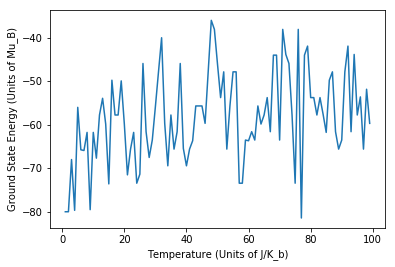

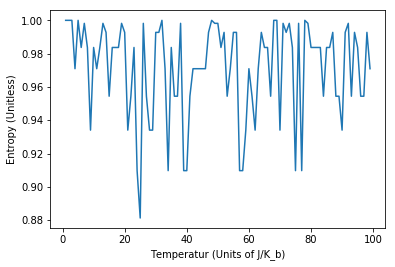

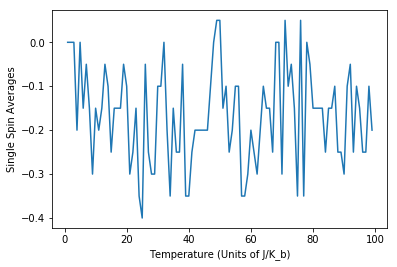

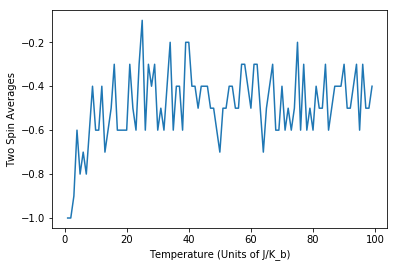

In [86]:
plt.plot(T, energy)
plt.xlabel("Temperature (Units of J/K_b)")
plt.ylabel("Ground State Energy (Units of Mu_B)")
plt.figure()

plt.plot(T, entropy)
plt.xlabel("Temperatur (Units of J/K_b)")
plt.ylabel("Entropy (Unitless)")
plt.figure()

plt.plot(T, singleSpin)
plt.xlabel("Temperature (Units of J/K_b)")
plt.ylabel("Single Spin Averages")
plt.figure()

plt.plot(T, twoSpin)
plt.xlabel("Temperature (Units of J/K_b)")
plt.ylabel("Two Spin Averages")
plt.figure()

#### Final commentary for part 1!
Right out the gate, we can see that the graph is a complete and utter mess. Is this a mistake? Well, consider the issue of antialignment being implied by J1, and alignment with second-closest neighbour by J2. These two synergize, as noted back in A2 b, maximizing disorder. Now, note that our magnetic field is weak - it is only 1, which in A2b was firmly in the maximal entropy range. Furthermore, our temperature quickly escalates, where t = 1 could be barely coped with by prior graphs. From prior assignment experience, the higher the temperature, the higher the entropy, if entropy can rise at all. We can see that entropy remains pretty stable at a high value, although there are massive spikes downward from time to time. 

All of this explains why the ground state energy graph is a complete and utter mess. It's just all over the place, because for the reasons in the prior paragraph, it can go anywhere.

The entropy graph begins near one - right out of the gate, it's wildly entropic. It never dips down below 0.80, implying consistently high entropy, and it appears these dips occur in random spikes. These spikes occur when single-spin appears to spike downward, and two-spin spikes upwards, implying cases where one schema appears to win over another, but it's brief and, upon rerunning it again, apparently entirely random.

Because we began with an already maximally entropic situation equivalent to B = 1 from A2 b, the effect of further temperature added can't really increase the entropy. Only random fluctuations can decrease it - which is more or less what we observe.

But wait! Notice the spin graphs are consistently in the negatives! They don't average near 0, where maximal entropy would really be. That is, more spins are down than up! What is this madness??? It probabily has to do with interaction with the magnetic field. Though we have already hit T = 100, notice that the last graph appears to be rising and converging on 0 eventually. Perhaps with T = 10000, it will eventually hit 0, as the influence of the magnetic field is totally overpowered. It also makes sense then, that the low entropy spikes are correlated with an unusual number of spins pointed in the same direction - that is, an unusually low number. That's all for part A!

## Part B (25 points). Partial Differential Equations

Consider Schrodinger's equation:
$$i\hbar\frac{\partial}{\partial t}\psi(x,t)=-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}\psi(x,t),$$
where $\psi(x,t)$ is the (complex) probability amplitude; the modulus square of this is the corresponding probability $p(x,t)=|\psi(x,t)|^2$.

Recall that one may approximate the second spatial derivative on a lattice using a three-point stencil
$$f''(x)\approx\frac{f(x+a)-2f(x)+f(x-a)}{a^2}$$
or a five-point stencil
$$f''(x)\approx\frac{-f(x+2a)+16f(x+a)-30f(x)+16f(x-a)-f(x-2a)}{12a^2}.$$
Representing $f(x)$ as a vector of values at positions $x_j=ja$, where $a$ is the lattice spacing, then the action of these stencils is equivalent to that of a matrix $M$ on the vector, i.e.
$$f''\approx Mf.$$
The formal solution to Schrodinger's equation at any time is therefore given by
$$\psi(x,t)=\exp\left\{\frac{i}{\hbar}\frac{\hbar^2}{2m}Mt\right\}\psi(x,0).$$

As we saw in Chapter 3, if we diagonalize $M$, then it can be represented as 
$$M=U\Lambda U^T,$$
where $\Lambda$ is the diagonal matrix of eigenvalues of $M$, and $U$ is a unitary transformation related to the eigenvectors (I'm writing $U^T$ as the conjugate transpose of $U$ because the Python notebook can't seem to represent the dagger). Because $UU^T=U^TU=I$ (the identity matrix), we immediately have
$$M^n=U\Lambda^nU^T.$$

### Question B1 (5 points)

**(a) (5 points)** Using the identity
$$e^x=\sum_{n=0}^{\infty}\frac{x^n}{n!}$$
prove analytically that  
$$\exp\left\{M\right\}=U\exp\left\{\Lambda\right\}U^T.$$
Note that the exponential of a diagonal matrix is the exponentiation of the diagonal elements. 

1. $$M=U\Lambda U^T$$
2. $$M^n=U\Lambda^nU^T.$$
3. $$e^x=\sum_{n=0}^{\infty}\frac{x^n}{n!}$$

$$\exp\left\{M\right\}=\exp\left\{U\Lambda U^T\right\}$$ (Using 1)
$$\exp\left\{U\Lambda U^T\right\} = \sum_{n=0}^{\infty}\frac{(U\Lambda U^T)^n}{n!}$$ (Using 3.) 
$$\sum_{n=0}^{\infty}\frac{(U\Lambda U^T)^n}{n!} = \sum_{n=0}^{\infty}\frac{U (\Lambda)^n U^T}{n!}$$ (Using 2.) 
$$\sum_{n=0}^{\infty}\frac{U (\Lambda)^n U^T}{n!} = U (\sum_{n=0}^{\infty}\frac{(\Lambda)^n}{n!}) U^T$$ (Factoring out left and right, something that doesn't depend on n.)
$$U (\sum_{n=0}^{\infty}\frac{(\Lambda)^n}{n!}) U^T = U \exp\left\{\Lambda \right\} U^T$$ (Using 3 in reverse)

QED.

### Question B2 (20 points)

**(a) (15 points)** Write a program to solve for the evolution of Schrodinger's equation, using the eigenvalue method above, for a three-point stencil to approximate the second-order spatial derivative. Assume that the initial condition is
$\psi(x,t=0)\propto e^{-(x-5)^2/2}$, where $0\leq x\leq 10$ and the system has periodic boundary conditions. Use a grid of $N=100$ points, and choose times sufficiently long that the evolution exhibits wave interference. Make a movie of the evolution.

**(b) (5 points)** Repeat part (a), but now with a five-point stencil.

The formal solution to Schrodinger's equation at any time is therefore given by

$$\psi(x,t)=\exp\left\{\frac{i}{\hbar}\frac{\hbar^2}{2m}Mt\right\}\psi(x,0).$$

$$\exp\left\{M\right\}=U \exp\left\{\Lambda \right\} U^T$$

Note that the exponential of a diagonal matrix is the exponentiation of the diagonal elements. 
### Steps, I think:
1. Find $$\frac{i}{\hbar} \frac{\hbar^2}{2m}Mt$$ for some t
2. Diagonalize it.
3. Exponentiate its diagonal elements
4. Run \psi(x,0) as a vector through all 3 matrixes.
5. That is the result.

### Note unitless form:
$$\frac{i \hbar}{2m}Mt$$
$$\frac{i}{2}Mt$$ where this i ate the other stuff, and is complex * something funny.

In [50]:
#Derrivaitve matrix stencils with periodic boundary conditions

"""
Generates the N by N matrix representing the second derrivative.
Three point stencil method
This one with periodic boundary conditions.
"""
def genMat3Stencil(N):
  mat = []

  ones = 1 #/a**2
  twos = -2 #/a**2

  for i in range(N):
    row = [0]*i + [ones] + [twos] + [ones] + [0]*(N-i)
    row = row[1:len(row)-2]
    mat.append(row)
  #Now do something funny to the first and last rows.
  # Make matrix that enforces endpoint conditions??
  fstRowi = 0
  lstRowi = len(mat)-1
  mat[fstRowi][-1] = ones
  mat[lstRowi][0] = ones

  return mat

"""
Generates the N by N matrix representing the second derrivative.
Five point stencil method
This one with periodic boundary conditions.
"""
def genMat5Stencil(N):
  mat = []

  divFac = 12 #*a**2

  ones = -1/divFac
  sixteens = 16/divFac
  thirties = -30/divFac
  

  for i in range(N):
    row = [0]*(i-1) + [ones] + [sixteens] + [thirties] + [sixteens] + [ones] + [0]*(N-i-1)
    row = row[1:len(row)-2]
    mat.append(row)
  #Now do something funny to the first and last rows.
  # Make matrix that enforces endpoint conditions??
  fstRowi = 0
  sndRowi = 1
  sndLstRowi = len(mat)-1-1
  lstRowi = len(mat)-1
  mat[fstRowi] = [thirties] + [sixteens] + [ones] + [0]*(N-5) + [ones] + [sixteens]
  mat[lstRowi] = [sixteens] + [ones] + [0]*(N-5) + [ones] + [sixteens] + [thirties]

  mat[sndRowi] = [sixteens] + [thirties] + [sixteens] + [ones] + [0]*(N-5) + [ones]
  mat[sndLstRowi] = [ones] + [0]*(N-5) + [ones] + [sixteens] + [thirties] + [sixteens]
  #Now the other rows.

  return mat

In [83]:
genMat5Stencil(5)

[[-2.5,
  1.3333333333333333,
  -0.08333333333333333,
  -0.08333333333333333,
  1.3333333333333333],
 [1.3333333333333333,
  -2.5,
  1.3333333333333333,
  -0.08333333333333333,
  -0.08333333333333333],
 [-0.08333333333333333,
  1.3333333333333333,
  -2.5,
  1.3333333333333333,
  -0.08333333333333333],
 [-0.08333333333333333,
  -0.08333333333333333,
  1.3333333333333333,
  -2.5,
  1.3333333333333333],
 [1.3333333333333333,
  -0.08333333333333333,
  -0.08333333333333333,
  1.3333333333333333,
  -2.5]]

In [ ]:
#The above looks right for a 5-point stencil matrix with periodic boundary conditions, so what's going on later on?

In [118]:
"""
Here is the key function for solving this problem. It uses the analytic equation.
"""

def shrogTimeRes(t, psi_0, stenFunc):
    N = len(psi_0)
    
    M = stenFunc(N)
    M = np.array(M, dtype = 'complex128')
    M *= 1j/2
    M *= t
    eigVal, eigMat = np.linalg.eig(M)
    transpose = np.transpose(eigMat)
    expEigVal = []
    for val in eigVal:
        expEigVal.append(np.exp(val))
        
    diagMat = np.diag(expEigVal)
    result = np.dot(transpose, psi_0)
    result = np.dot(diagMat, result)
    result = np.dot(eigMat, result)
    
    return result

In [119]:
def initCond(x):
    expVal = -((x-5)**2)
    return np.exp(expVal)

In [120]:
#Part a
N = 100
X = [x/10 for x in range(N)] # X from 0 to N
T = [t for t in range(0, 1000, 10)]

Rho_0 = []
for x in X:
    Rho_0.append(initCond(x))

timeEvo = []
for t in T:
    stenFunc = genMat3Stencil
    timeEvo.append(shrogTimeRes(t, Rho_0, stenFunc))
    
reses = []
for rho in timeEvo:
    rhoConjug = np.conj(rho)
    res = rho * rhoConjug
    reses.append(res)

/usr/lib/python3/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


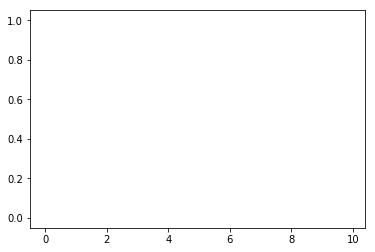

In [121]:
import random
from matplotlib import animation, rc

fig = plt.figure()

imPerNum = 4

ims = []
count = 0
for res in reses:
    count = count % imPerNum
    if (count == 0):
        im = plt.plot(X,res,color='black')
        ims.append(im)
    count += 1
ani = animation.ArtistAnimation(fig, ims)

# ani.save('potential0to1.mp4')

rc('animation', html='html5')
ani

### Here it is; it works excactly as expected, this method rocks!

In [124]:
#Part b
N = 100
X = [x/10 for x in range(N)] # X from 0 to N
T = [t for t in range(0, 1000, 10)]

Rho_0 = []
for x in X:
    Rho_0.append(initCond(x))

timeEvo = []
for t in T:
    stenFunc = genMat5Stencil
    timeEvo.append(shrogTimeRes(t, Rho_0, stenFunc))
    
reses = []
for rho in timeEvo:
    rhoConjug = np.conj(rho)
    res = rho * rhoConjug
    reses.append(res)

/usr/lib/python3/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


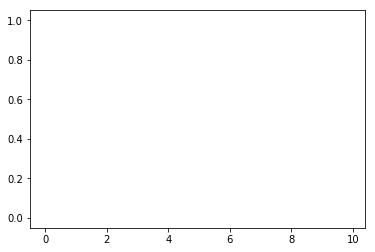

In [125]:
import random
from matplotlib import animation, rc

fig = plt.figure()

imPerNum = 1

ims = []
count = 0
for res in reses:
    count = count % imPerNum
    if (count == 0):
        im = plt.plot(X,res,color='black')
        ims.append(im)
    count += 1
ani = animation.ArtistAnimation(fig, ims)

# ani.save('potential0to1.mp4')

rc('animation', html='html5')
ani

### Commentary: Uh oh, this method doesn't work like I expected it should. Instabilities caused by the 5-point stencil method appear to cause a sort of preferential side to the wave motion. If I had more time, I'd investigate why this is the case; for now I can only blame the fact learned from prior assignments that the 5-point stencil method is generally worse than the 3-point method at stability. It looks a lot like the stencil is being applied to the wrong centerpoint or something, but checking with how the matrix looks like, this shouldn't be the case...

## The usual reason is due to floating point errors ever propagating. The 5 point stencil begins with copious use of floating points due to terms like 30/12 = 2.5, and then exponentiation itself brings in a LOT of floating points, which can massively increase the error.

### Upon further investigation, what's especially confusing is that it clearly veers off into something massively wrong, and then teleports right back onto a shape that's clearly right. Huh?

### Alright, so the fun thing about this method is, that even if there are errors caused by floating point madness, it's local to each calculation, since each next step is a fresh calculation not dependent on prior calculations. That's why it jilts and teleports back - some steps may be insane, but then others not. If further improvements can be had to the stability of this method, then this exponentiation method would probably be ideal due to the locality of the errors.